## Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.
Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.
As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 
In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.
-Data sourcing and sentiment analysis
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products.This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. The steps to be performed for the first task are given below.
Exploratory data analysis
Data cleaning
Text preprocessing
Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.
Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

Out of these four models, you need to select one classification model based on its performance.

-Building a recommendation system
As you learnt earlier, you can use the following types of recommendation systems.
1. User-based recommendation system
2. Item-based recommendation system
Your task is to analyse the recommendation systems and select the one that is best suited in this case. 
Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. You can use the 'reviews_username' (one of the columns in the dataset) to identify your user. 

-Improving the recommendations using the sentiment analysis model
Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we asked you to select one ML model out of the four options). Once you recommend 20 products to a particular user using the recommendation engine, you need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews. 
In this way, you will get an ML model (for sentiments) and the best-suited recommendation system. Next, you need to deploy the entire project publically.

-Deploying the end-to-end project with a user interface
Once you get the ML model and the best-suited recommendation system, you will deploy the end-to-end project. You need to use the Flask framework, which is majorly used to create web applications to deploy machine learning models.
To make the web application public, you need to use Heroku, which works as the platform as a service (PaaS) that helps developers build, run and operate applications entirely on the cloud.
Next, you need to include the following features in the user interface.
Take any of the existing usernames as input.
Create a submit button to submit the username.
Once you press the submit button, it should recommend 5 products based on the entered username.


 

In [1]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#--- StopWords
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import re
from wordcloud import WordCloud, STOPWORDS
import pickle
import warnings
warnings.filterwarnings("ignore")

#### Reading and understanding the data

In [2]:
df = pd.read_csv("sample30.csv")

In [3]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
df.shape

(30000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
id                      30000 non-null object
brand                   30000 non-null object
categories              30000 non-null object
manufacturer            29859 non-null object
name                    30000 non-null object
reviews_date            29954 non-null object
reviews_didPurchase     15932 non-null object
reviews_doRecommend     27430 non-null object
reviews_rating          30000 non-null int64
reviews_text            30000 non-null object
reviews_title           29810 non-null object
reviews_userCity        1929 non-null object
reviews_userProvince    170 non-null object
reviews_username        29937 non-null object
user_sentiment          29999 non-null object
dtypes: int64(1), object(14)
memory usage: 3.4+ MB


#### Data Cleaning

In [6]:
#Checking Null precentage
na_col = (df.isna().sum()/df.shape[0])*100
na_col=na_col[na_col.values>0]
na_col

manufacturer             0.470000
reviews_date             0.153333
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_title            0.633333
reviews_userCity        93.570000
reviews_userProvince    99.433333
reviews_username         0.210000
user_sentiment           0.003333
dtype: float64

In [7]:
# Removing all columns with more than 50% null values
na_col = list(na_col[na_col.values>=50].index)
df.drop(labels=na_col,axis=1,inplace=True)

In [8]:
na_col = (df.isna().sum()/df.shape[0])*100
na_col=na_col[na_col.values>0]
na_col

manufacturer            0.470000
reviews_date            0.153333
reviews_didPurchase    46.893333
reviews_doRecommend     8.566667
reviews_title           0.633333
reviews_username        0.210000
user_sentiment          0.003333
dtype: float64

In [9]:
# Checking duplicates which have same id and username
df_duplicates = df[df.duplicated(subset={"reviews_username","id"})]
df_duplicates.reviews_username.value_counts()

byamazon customer    39
mike                 24
chris                19
tony                  7
scott                 6
                     ..
billybob789           1
klh392                1
macdaddy3409          1
marciejo              1
katrina               1
Name: reviews_username, Length: 2116, dtype: int64

In [10]:
#Deleting all the duplicates having the same product id and username.
df = df.drop_duplicates(subset={"reviews_username","id"},keep="first")

In [162]:
pickle.dump(df, open('data','wb'))

## EDA

In [12]:
df['reviews_didPurchase'].value_counts()

False    13575
True      1423
Name: reviews_didPurchase, dtype: int64

In [13]:
df['reviews_didPurchase'].fillna('Null', inplace=True)

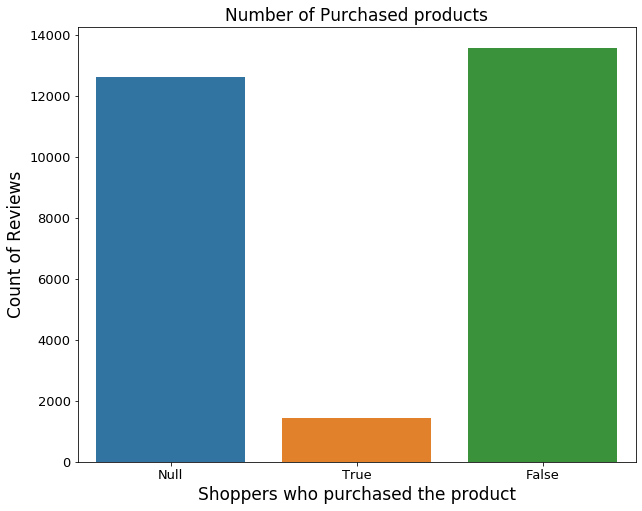

In [14]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers who purchased the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Purchased products', fontsize=17)
ax.tick_params(labelsize=13)
plt.show()

Inference:- We can the people have pruchased the products are vert less when compared to people who haven't

In [15]:
df['reviews_doRecommend'].value_counts()

True     24087
False     1506
Name: reviews_doRecommend, dtype: int64

In [16]:
df['reviews_doRecommend'].fillna('Null', inplace=True)

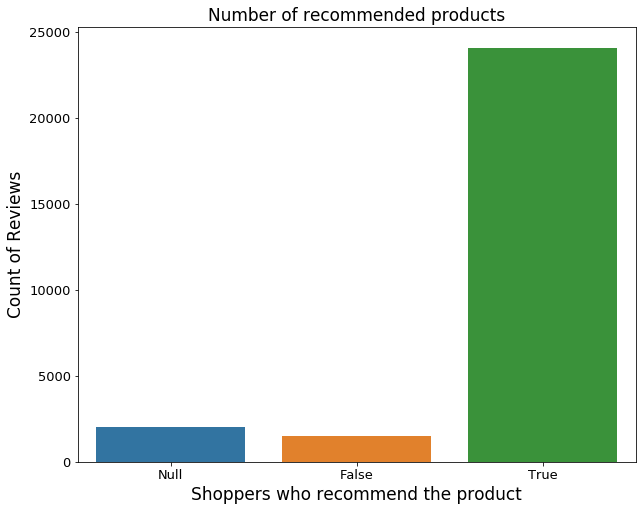

In [17]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_doRecommend'])
ax.set_xlabel(xlabel="Shoppers who recommend the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of recommended products', fontsize=17)
ax.tick_params(labelsize=13)
plt.show()

Inference:- We can see the number of people who have recommended the projet are higher than people who haven't

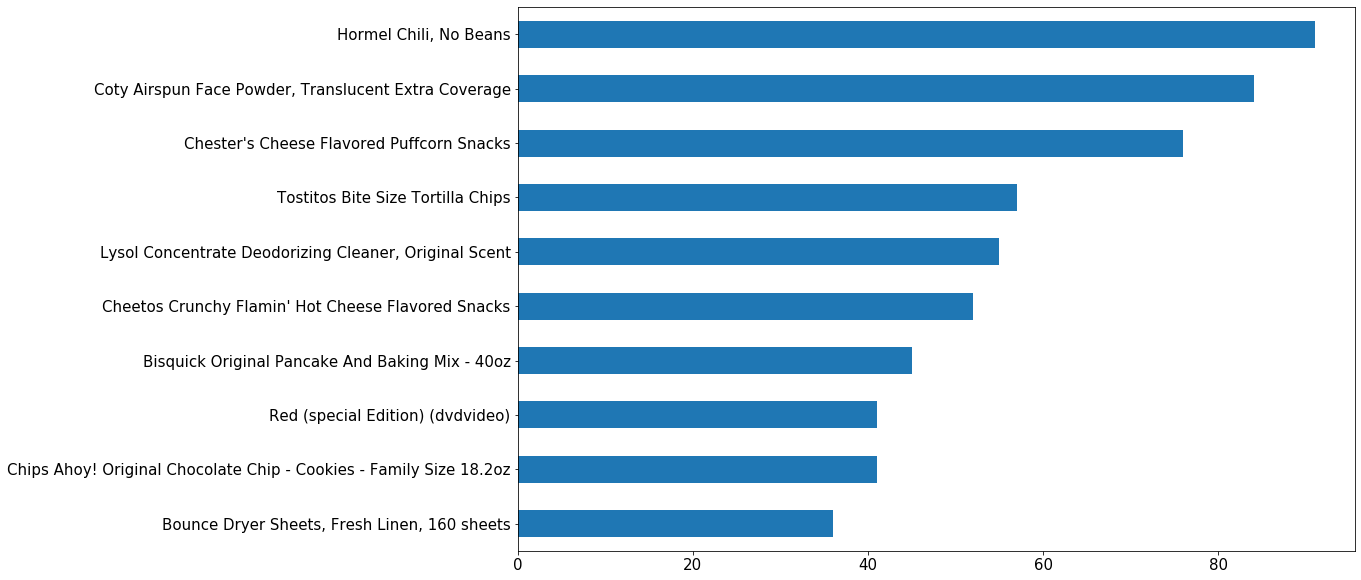

In [18]:
#Checking top 10 most purchased product
result = df[df['reviews_didPurchase'] == True]
result['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[15,10], fontsize=15).invert_yaxis()

Inference:- Hormel Chill,No beans is the product which was purchased the most. 

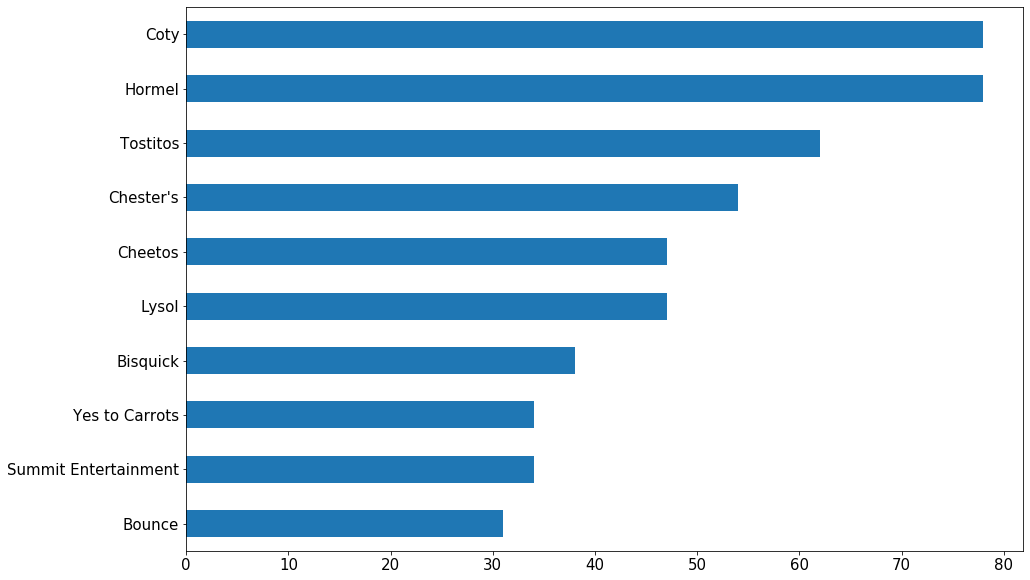

In [19]:
#Checking top 10 most Trusted Brand
result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Positive")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[15,10], fontsize=15).invert_yaxis()

Inference:- Hormel is the Most Trusted brand with positive setiments 

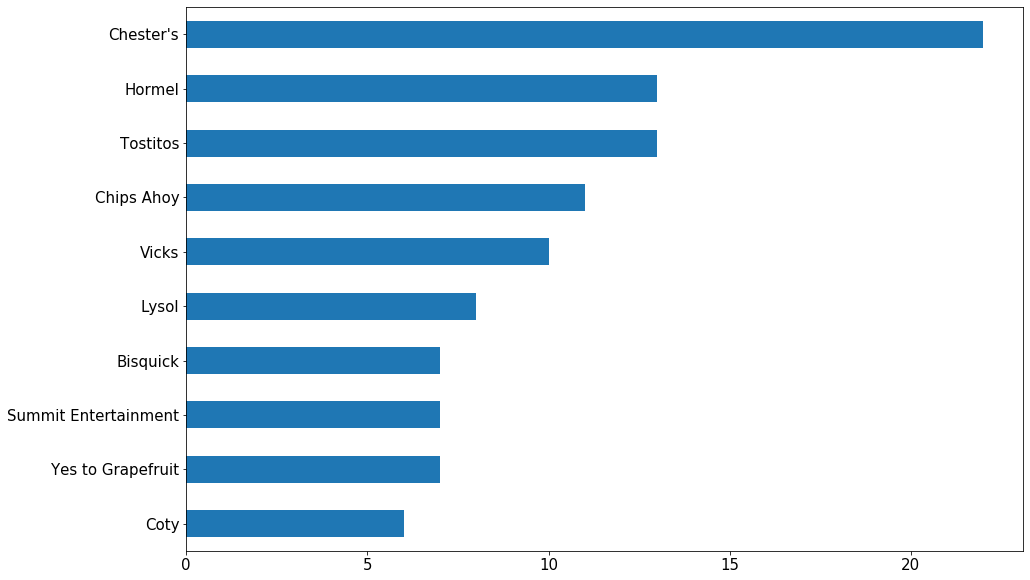

In [20]:
#Checking Least Trusted Brand
result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Negative")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[15,10], fontsize=15).invert_yaxis()

Inference:- Chester's is the least trusted brand with negative user sentiments 

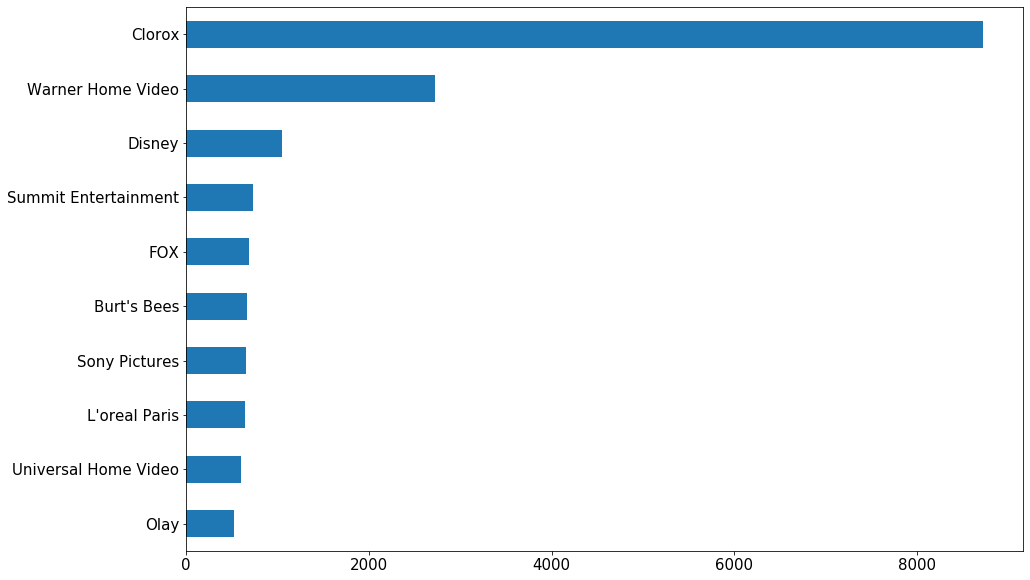

In [21]:
#Checking top 10 most Recommeded Brand with Positive user sentiment 
result = df[(df['reviews_doRecommend'] == True) & (df.user_sentiment=="Positive")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[15,10], fontsize=15).invert_yaxis()

Inference:- Clorox is the most recommended brand with positive user sentiments

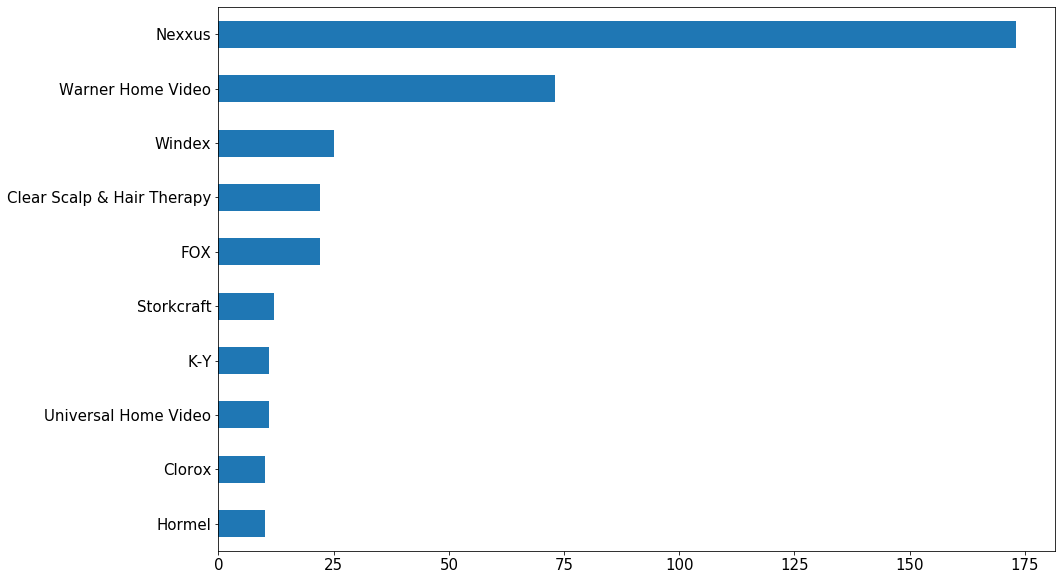

In [22]:
#Checking top 10 Least Recommeded Brand with Positive user sentiment 
result = df[(df['reviews_doRecommend'] == False) & (df.user_sentiment=="Negative")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[15,10], fontsize=15).invert_yaxis()

Inference:- Nexxus is the least recommended brand with negative user sentiments

In [23]:
# Seprating Year from reviews date
df['reviews_date'].value_counts()

2012-01-26T00:00:00.000Z    975
2014-12-03T00:00:00.000Z    470
2014-09-19T00:00:00.000Z    389
2014-12-05T00:00:00.000Z    320
2012-01-27T00:00:00.000Z    281
                           ... 
2014-12-05T14:56:48.000Z      1
2011-04-20T07:00:00.000Z      1
2015-02-25T14:30:32.000Z      1
2010-03-21T00:00:00.000Z      1
2016-12-20T13:23:03.000Z      1
Name: reviews_date, Length: 5860, dtype: int64

In [24]:
df['reviews_date'] = df['reviews_date'].str[:10]

In [25]:
# Checking for null values in review date
df['reviews_date'].isna().sum()

43

In [26]:
df['reviews_date'] = pd.to_datetime(df['reviews_date'], errors='coerce')

In [27]:
df['reviews_date'].isna().sum()

51

In [28]:
# Assigning year to year column in dataframe df
df['year'] = df['reviews_date'].dt.year

In [29]:
df['year'].isna().sum()

51

In [30]:
df['year'].value_counts()

2014.0    7851
2015.0    5973
2016.0    4497
2012.0    3952
2017.0    2731
2013.0    1284
2009.0     445
2011.0     438
2010.0     351
2008.0      19
2007.0      10
2018.0       3
Name: year, dtype: int64

In [31]:
# Filling Null Values with 2014.0
df['year'] = df['year'].fillna(2014.0)

In [32]:
df['year'].isna().sum()

0

In [33]:
# Converting year column to type int
df['year'] = df['year'].astype(int)

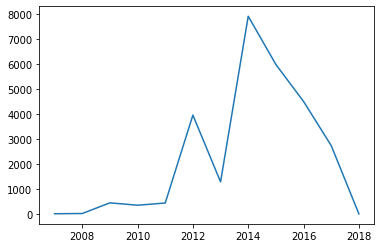

In [34]:
sns.lineplot(data=df['year'].value_counts())

Inference:- 2014 was the year people most gave reviews in and then we can see the steady decline till year 2018

In [35]:
df['month'] = df['reviews_date'].dt.month

In [36]:
df['month'].isna().sum()

51

In [37]:
df['month'].value_counts()

1.0     6642
12.0    5444
2.0     2751
10.0    1882
11.0    1811
9.0     1746
3.0     1389
8.0     1290
5.0     1244
4.0     1193
6.0     1133
7.0     1029
Name: month, dtype: int64

In [38]:
# Filling null values with 1.0 in month column
df['month'] = df['month'].fillna(1.0)

In [39]:
# Assigning month to month column in dataframe df
df['month'] = df['month'].astype(int)

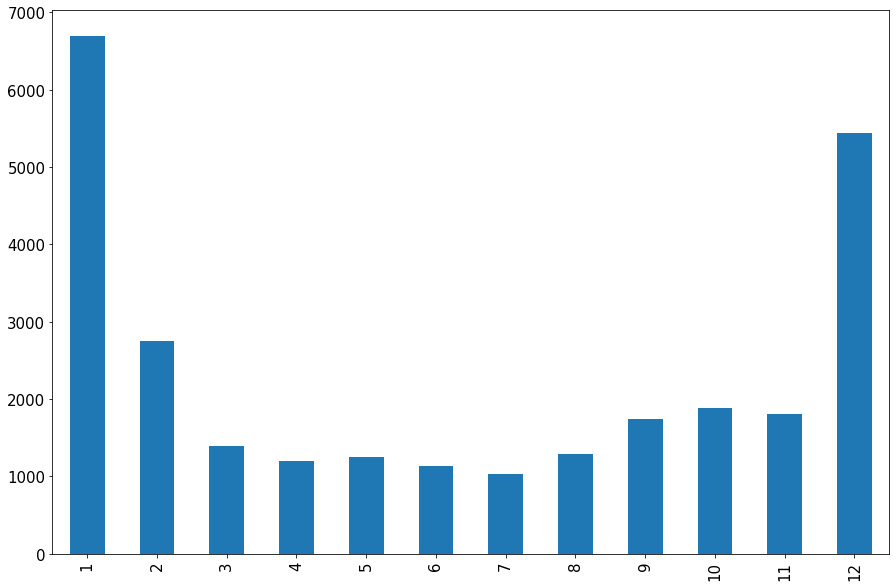

In [40]:
df['month'].value_counts().sort_index().plot(kind = 'bar', figsize=[15,10], fontsize=15)

Inference:- We can see the highest number of reviews are in month January followed by december 

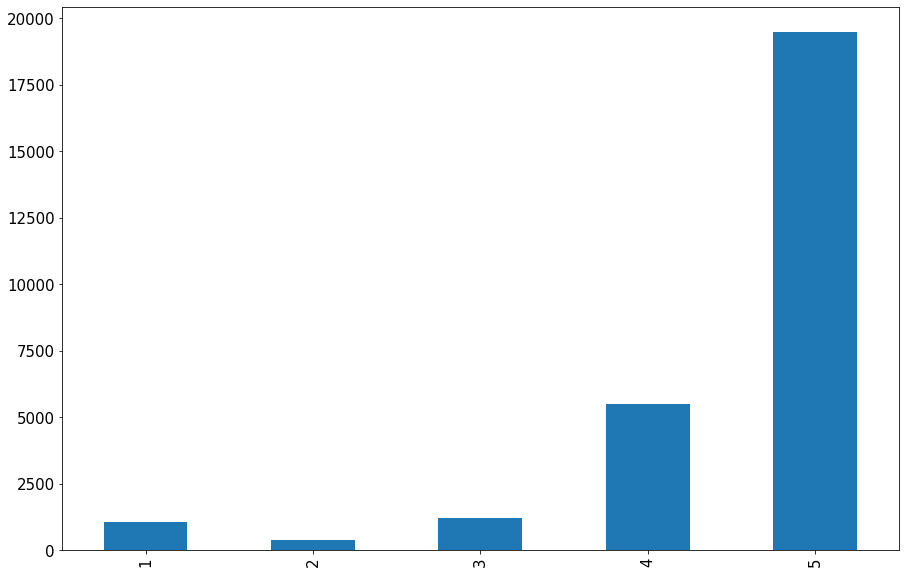

In [41]:
df['reviews_rating'].value_counts().sort_index().plot(kind = 'bar', figsize=[15,10], fontsize=15)

Inference:- We can see the reviews given by people are mostly 5 Star

#### Since we are doing sentiment analysis, we just need 3 mst relevant columns from the entire dataset- user_sentiment , reviews_text & reviews_title.Hence we form a new datafrane with these 3 columns only

In [42]:
# Assigning useful columns in dffinal dataframe  
dfFinal = df[['reviews_text','reviews_title','user_sentiment']]

In [43]:
dfFinal.shape

(27605, 3)

In [44]:
dfFinal.head()

,reviews_text,reviews_title,user_sentiment
0,i love this album. it's very good. more to the...,Just Awesome,Positive
1,Good flavor. This review was collected as part...,Good,Positive
3,I read through the reviews on here before look...,Disappointed,Negative
4,My husband bought this gel for us. The gel cau...,Irritation,Negative
5,My boyfriend and I bought this to spice things...,Not worth it,Negative


In [45]:
#concatenate user_text and user_title
# Filling missing values in Reviews title with blank space
dfFinal['reviews_title'] = dfFinal['reviews_title'].fillna('')
dfFinal['user_reviews'] = dfFinal[['reviews_title', 'reviews_text']].agg(' '.join, axis=1).str.lstrip('. ')
dfFinal[['reviews_title','reviews_text','user_reviews']]

,reviews_title,reviews_text,user_reviews
0,Just Awesome,i love this album. it's very good. more to the...,Just Awesome i love this album. it's very good...
1,Good,Good flavor. This review was collected as part...,Good Good flavor. This review was collected as...
3,Disappointed,I read through the reviews on here before look...,Disappointed I read through the reviews on her...
4,Irritation,My husband bought this gel for us. The gel cau...,Irritation My husband bought this gel for us. ...
5,Not worth it,My boyfriend and I bought this to spice things...,Not worth it My boyfriend and I bought this to...
...,...,...,...
29995,Softness!!,I got this conditioner with Influenster to try...,Softness!! I got this conditioner with Influen...
29996,I love it,"I love it , I received this for review purpose...","I love it I love it , I received this for revi..."
29997,Hair is so smooth after use,First of all I love the smell of this product....,Hair is so smooth after use First of all I lov...
29998,Perfect for my oily hair!,I received this through Influenster and will n...,Perfect for my oily hair! I received this thro...


In [46]:
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)

In [47]:
# Removing stopwords
def remove_stopwords(text):    
    return " ".join([word for word in text.split(" ") if word not in nltk.corpus.stopwords.words('english')])

In [48]:
# Lemmatise sentence
def lemmatize_sentence(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])


In [49]:
#pre-processing output for one Review
def preprocessText(text, stem=False):
    text= text.lower() #--- transform to lower case
    text= remove_stopwords(text) # remove stopwords
    text = strippunc(text) #--- remove Punctuation
    return lemmatize_sentence(text)

In [50]:
# Preprocessing the text:- Removing the 
df_main = dfFinal.copy(deep = True)
df_main['Review'] = df_main['user_reviews'].map(preprocessText)
df_main.head()

,reviews_text,reviews_title,user_sentiment,user_reviews,Review
0,i love this album. it's very good. more to the...,Just Awesome,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,Good flavor. This review was collected as part...,Good,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
3,I read through the reviews on here before look...,Disappointed,Negative,Disappointed I read through the reviews on her...,disappointed read review look buy one couple l...
4,My husband bought this gel for us. The gel cau...,Irritation,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel we gel cause irrita...
5,My boyfriend and I bought this to spice things...,Not worth it,Negative,Not worth it My boyfriend and I bought this to...,worth boyfriend buy spice thing bedroom highly...


In [51]:
df_main.head()

,reviews_text,reviews_title,user_sentiment,user_reviews,Review
0,i love this album. it's very good. more to the...,Just Awesome,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,Good flavor. This review was collected as part...,Good,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
3,I read through the reviews on here before look...,Disappointed,Negative,Disappointed I read through the reviews on her...,disappointed read review look buy one couple l...
4,My husband bought this gel for us. The gel cau...,Irritation,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel we gel cause irrita...
5,My boyfriend and I bought this to spice things...,Not worth it,Negative,Not worth it My boyfriend and I bought this to...,worth boyfriend buy spice thing bedroom highly...


In [52]:
from wordcloud import WordCloud, STOPWORDS

In [53]:
stopwords = set(STOPWORDS)

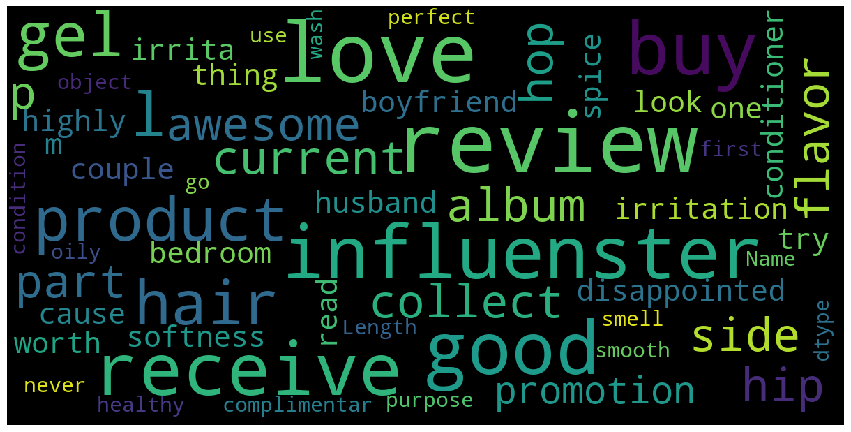

In [54]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=42 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_main['Review'])

In [55]:
# saving data for future purpose

# pickle.dump(df_main, open("data.pkl","wb"))

In [56]:
import pickle as pickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [57]:
data = df_main

In [58]:
### Class Imbalance check and method to handle it
data.groupby(['user_sentiment']).count()

,reviews_text,reviews_title,user_reviews,Review
user_sentiment,,,,
Negative,3058,3058,3058,3058
Positive,24547,24547,24547,24547


## Model Building

## Creating the tfidf vectoriser 

In [59]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data['Review'])
X = tfidf_vectorizer.transform(data['Review'])
y = data['user_sentiment']

In [161]:
# Saving TFIDF Vectoriser for future purpose
pickle.dump(tfidf_vectorizer, open('tfidf_vectoriser.sav', 'wb'))

In [61]:
# Splitting the dataframe into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

### Checking for class imbalance 

In [62]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print("Before", counter)

#oversampling using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After", counter)

Before Counter({'Positive': 18397, 'Negative': 2306})
After Counter({'Negative': 18397, 'Positive': 18397})


In [63]:
########### Model Building #################

We will build 4 models here and assess the performance of each and select the best :

- Naive Bayes
- Random Forest
- Logistic Regression
- XgBoost

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection

In [65]:
def show_metrics(y_true, y_pred):
    plt.figure(figsize=(10,6))
    cm = confusion_matrix(y_true, y_pred)
    g1 = sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens")
    bottom, top = g1.get_ylim() # Since top and bottom lines were not clear
    g1.set_ylim(bottom + 0.5, top - 0.5) # setting offset with 0.5 to make them clear
    plt.show()
    print("Accuracy: {}".format(np.round(accuracy_score(y_true, y_pred)*100,2)))


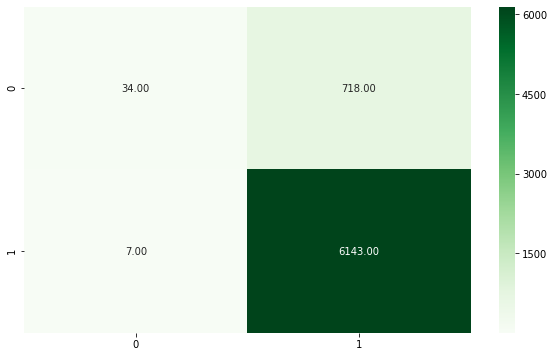

Accuracy: 89.5


In [66]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
show_metrics(y_test, y_pred)

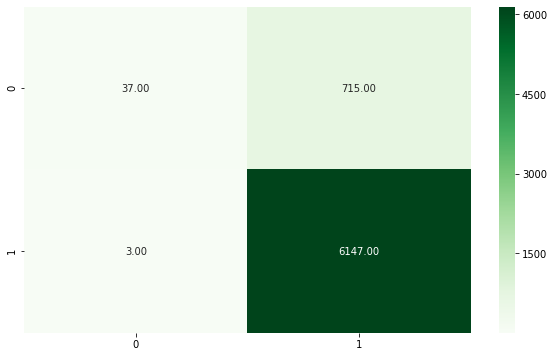

Accuracy: 89.6


In [67]:
# Random Forest Classifier 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
show_metrics(y_test, y_pred)

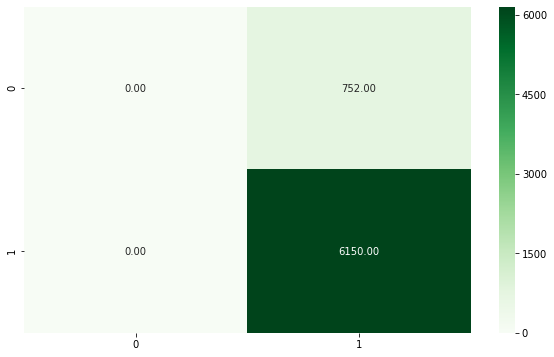

Accuracy: 89.1


In [68]:
# Naive Byes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

show_metrics(y_test, y_pred)

[10:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


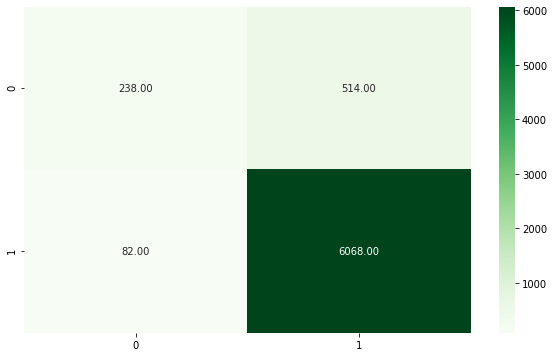

Accuracy: 91.36


In [69]:
# XGBoost Classifier model
xgclf = XGBClassifier()
xgclf.fit(X_train, y_train)
y_pred = xgclf.predict(X_test)

show_metrics(y_test, y_pred)

## HyperParemeter tunning 

In [70]:
# Hyper Parameter tuning the XG boost method gives us the best accuracy 

In [71]:
xgb_model = XGBClassifier()

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4], 'max_depth':[5, 10],  'n_estimators':[50, 100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=2,
                                       cv=3,
                                       scoring='accuracy',
                                       verbose = 1,
                                       return_train_score=True)

clf_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:  8.9min finished


[10:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [72]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
0.909288508911752
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [73]:
# Hyper Parameter tuning the Logistic Regression method 

In [74]:
lg_model = LogisticRegression()

c_space = np.logspace(-5, 8, 10)
parameters = {'C': c_space}

clf_lg = model_selection.GridSearchCV(estimator=lg_model,
                                       param_grid=parameters,
                                       n_jobs=4,
                                       cv=3,
                                       scoring='accuracy',
                                       verbose = 1,
                                       return_train_score=True)

clf_lg.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   40.2s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [75]:
print(clf_lg.best_params_)
print(clf_lg.best_score_)
print(clf_lg.best_estimator_)

{'C': 100000000.0}
0.9082741631647587
LogisticRegression(C=100000000.0)


In [76]:
# Hyper Parameter tuning the Random Forest Method

In [77]:
rf_model = RandomForestClassifier()

parameters = {'n_estimators' : [50,100] }

clf_rf = model_selection.GridSearchCV(estimator=rf_model,
                                       param_grid=parameters,
                                       n_jobs=4,
                                       cv=3,
                                       scoring='accuracy',
                                       verbose = 1,
                                       return_train_score=True)

clf_rf.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  5.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'n_estimators': [50, 100]}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [78]:
print(clf_rf.best_params_)
print(clf_rf.best_score_)
print(clf_rf.best_estimator_)

{'n_estimators': 50}
0.8925759551755784
RandomForestClassifier(n_estimators=50)


### After calculating accuracy for all the model and using hyper paramters, even though the accuracy of XG boost method is a little higher when compared to Logistic regression model. But logistic regression model is faster so going with Logistic regression model as our final model

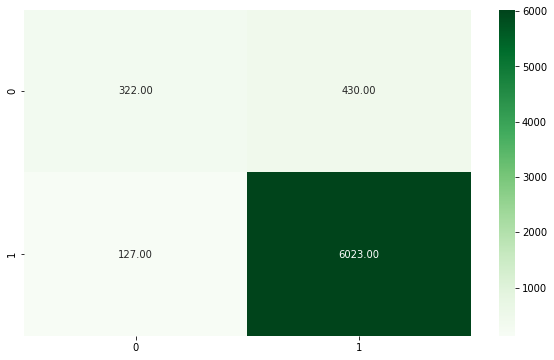

Accuracy: 91.93


In [79]:
best_model = LogisticRegression(C=100000000.0)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

show_metrics(y_test, y_pred)

In [160]:
pickle.dump(best_model, open("final_model.sav","wb"))

# Recommendation System 
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

## Reading the dataset

In [80]:
df = pd.read_csv("sample30.csv")
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


In [81]:
# Keeping only required data in the dataset df
df = df[['name', 'reviews_rating', 'reviews_username']]

In [82]:
# Checking for null values
df['name'].isna().sum()

0

In [83]:
# Checking for null values
df['reviews_username'].isna().sum()

63

In [84]:
# Removing rows where username is null
df = df[~df['reviews_username'].isnull()]

In [85]:
# Checking for null values
df['reviews_rating'].isna().sum()

0

In [86]:
# Removing duplicates from the df
df_ratings =  df.drop_duplicates(subset={"reviews_username","name"},keep="first")
df_ratings.head()

,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,K-Y Love Sensuality Pleasure Gel,1,walker557
5,K-Y Love Sensuality Pleasure Gel,1,samantha


## Dividing the dataset into train and test

In [87]:
train, test = train_test_split(df_ratings, test_size=0.30, random_state=12)
print(train.shape)
print(test.shape)

(19311, 3)
(8277, 3)


In [88]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10ten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11111111aaaaaaaaaaaaaaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df_pivot.shape

(17817, 251)

### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [90]:
dummy_train = train.copy()

In [91]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [92]:
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.


# User Similarity Matrix

## Using Cosine Similarity

In [93]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]]


In [94]:
user_correlation.shape

(17817, 17817)

## Using adjusted Cosine 

### Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [95]:
# Create a user-movie matrix.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [96]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [97]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [98]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [99]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [100]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 3.42494465, 0.        , ..., 3.37967134, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
user_predicted_ratings.shape

(17817, 251)

In [103]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,3.424945,0.0,0.0,0.0,0.0,0.0,0.0,0.298807,0.0,...,2.882783,0.0,0.816497,0.0,0.0,2.224971,0.0,3.379671,0.0,0.0
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
08dallas,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

### Finding the top 20 recommendation for the *user*

In [104]:
user_input='dorothy w'
print(user_input)

dorothy w


In [105]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Yes To Grapefruit Rejuvenating Body Wash                                                        0.0
Fantasy Fields Lil' Sports Fan Step Stool - Teamson                                             0.0
Heiress (dvd)                                                                                   0.0
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                                             0.0
Head & Shoulders Classic Clean Conditioner                                                      0.0
Hawaiian Punch Berry Limeade Blast Juice                                                        0.0
Happy Tot Apple and Butternut Squash                                                            0.0
Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio    0.0
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                 0.0
Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca                      

# Evaluation - User User 

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user. 

In [106]:
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1044, 3)

In [107]:
common.head()

,name,reviews_rating,reviews_username
26441,Stargate (ws) (ultimate Edition) (director's C...,5,andrea
15532,Chester's Cheese Flavored Puffcorn Snacks,5,jenny
14807,Clorox Disinfecting Wipes Value Pack Scented 1...,5,faith
10137,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ah78
6276,"Hormel Chili, No Beans",2,gina


In [108]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [109]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [110]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17807,17808,17809,17810,17811,17812,17813,17814,17815,17816
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [112]:
user_correlation_df_1.shape

(862, 17817)

In [113]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [114]:
user_correlation_df_3 = user_correlation_df_2.T

In [115]:
user_correlation_df_3.head()

,123charlie,50cal,aaron,abbi,acjuarez08,acv4217,adam,adelynsmom,adriana9999,adrienne,...,worm,wvshopaholic,xavier,xstr8edgex,yummy,yvonne,zach,zipper,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abbi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acjuarez08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.02062073, 0.        , 0.        , ..., 0.83333333, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [117]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [118]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [119]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [120]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [121]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [122]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.4762027517795313


## Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user instead of each movie. 

In [123]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zowie,zozo0o,zsarah,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each movie for using the Adujsted Cosine

In [124]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [125]:
df_subtracted.head()

reviews_username,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zowie,zozo0o,zsarah,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,0.269663,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [126]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [127]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [128]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.0493346 , 0.        , ..., 0.01784731, 0.        ,
        0.        ],
       [0.        , 0.02089238, 0.        , ..., 0.        , 0.00239422,
        0.01448899],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [129]:
item_predicted_ratings.shape

(17817, 251)

In [130]:
dummy_train.shape

(17817, 251)

### Filtering the rating only for the movies not rated by the user for recommendation

In [131]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.049335,0.0,0.0,0.0,0.0,0.0,0.0,0.025517,0.0,...,0.144658,0.0,0.046127,0.0,0.0,0.010872,0.0,0.017847,0.000000,0.000000
01impala,0.0,0.020892,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.025403,0.0,0.0,0.000000,0.0,0.000000,0.002394,0.014489
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
08dallas,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


### Finding the top 20 recommendation for the *user*

In [132]:
user_input='dorothy w'
print(user_input)

dorothy w


In [133]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Yes To Grapefruit Rejuvenating Body Wash                                                        0.0
Fantasy Fields Lil' Sports Fan Step Stool - Teamson                                             0.0
Heiress (dvd)                                                                                   0.0
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                                             0.0
Head & Shoulders Classic Clean Conditioner                                                      0.0
Hawaiian Punch Berry Limeade Blast Juice                                                        0.0
Happy Tot Apple and Butternut Squash                                                            0.0
Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio    0.0
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                 0.0
Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca                      

# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user. 

In [134]:
common =  test[test.name.isin(train.name)]
common.shape

(8257, 3)

In [135]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [136]:
common_item_based_matrix.shape

(197, 7941)

In [137]:
item_correlation_df = pd.DataFrame(item_correlation)

In [138]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
list_name = common.name.tolist()

In [141]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [142]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [143]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03482064, 0.02785651, ..., 0.        , 0.05747666,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02974552,
        0.        ],
       [0.        , 0.00399036, 0.00319229, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02414832, 0.01931866, ..., 0.        , 0.        ,
        0.        ]])

In [145]:
common_item_predicted_ratings.shape

(197, 7941)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [146]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [147]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [148]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [149]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [150]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5689995353976856


In [195]:
pickle.dump(user_final_rating, open('final_recommendation_system','wb'))

### we see user based recommendation system is more useful than item based when compared with their rmse

#### Conclusion :- After creating multiple models we found logistic regression to be the best suited model and user based recommendation to be best recommendation method. So we are using these to predict and recommend products for a specific user.

# Predicting the recommendation for the user dorothy w and then finding the sentiments for the products and recommending top 5 

In [200]:
data = pickle.load(open('data','rb'))

def predict_sentiment(reviews):
    vectoriser= pickle.load(open('tfidf_vectoriser.sav','rb'))    
    x_input = vectoriser.transform(reviews['reviews_text'])
    model = pickle.load(open('final_model.sav','rb'))
    y_pred= model.predict(x_input)
    y_pred_series = pd.Series(y_pred)
    out = round(y_pred_series.value_counts(normalize=True),2)
    print (out)
    try:
        positive_percent = out['Positive']
    except:
        positive_percent = 0.0
    return positive_percent


def recommend_product(user):
    product_sentiment_dict={}
    user_final_rating = pickle.load(open("final_recommendation_system",'rb'))
    recommend_products = user_final_rating.loc[user].sort_values(ascending=False)[0:20]

    for item in recommend_products.index:
        reviews = data[data['name'] == item]
        print(item)
        positive_percent = predict_sentiment(reviews)
        product_sentiment_dict[item] = positive_percent
    sorted_dict = sorted(product_sentiment_dict.items(), key=lambda x: x[1], reverse=True)
    top5 = []
    for item in sorted_dict[:5]:
        top5.append(item[0])
    print("Top5 Products are")
    return top5

In [202]:
recommend_product("dorothy w")

Yes To Grapefruit Rejuvenating Body Wash
Positive    0.85
Negative    0.15
dtype: float64
Fantasy Fields Lil' Sports Fan Step Stool - Teamson
Positive    1.0
dtype: float64
Heiress (dvd)
Positive    1.0
dtype: float64
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1
Positive    0.83
Negative    0.17
dtype: float64
Head & Shoulders Classic Clean Conditioner
Positive    0.97
Negative    0.03
dtype: float64
Hawaiian Punch Berry Limeade Blast Juice
Positive    0.95
Negative    0.05
dtype: float64
Happy Tot Apple and Butternut Squash
Positive    1.0
dtype: float64
Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio
Positive    1.0
dtype: float64
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd
Positive    0.9
Negative    0.1
dtype: float64
Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca
Positive    1.0
dtype: float64
Gain Original Scent Liquid Fabric Softener 129 Oz
Positive    1.0
dtype: float64
Fiskars174

["Fantasy Fields Lil' Sports Fan Step Stool - Teamson",
 'Heiress (dvd)',
 'Happy Tot Apple and Butternut Squash',
 'Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio',
 'Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca']